<a href="https://colab.research.google.com/github/maucasco/javeriana-poc-advocato/blob/main/imagefilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [4]:


import cv2

import numpy as np
import matplotlib.pyplot as plt
import exifread

def obtener_informacion_camara(imagen_path):
    properties={}
    with open(imagen_path, 'rb') as imagen:
        exifreadValues = exifread.process_file(imagen)
        tags = {}

        # Iterar sobre las etiquetas EXIF y eliminar las que contienen valores ASCII
        for tag, valor in exifreadValues.items():
            if isinstance(valor, bytes):
                try:
                    valor = valor.decode('utf-8')
                except UnicodeDecodeError:
                    pass
            tags[tag] = valor
        properties={
            "make":tags.get('Image Make', 'No disponible'),
            "model" : tags.get('Image Model', 'No disponible'),
            "latitude" : tags.get('GPS GPSLatitudeRef', 'No disponible'),
            "longitude" : tags.get('GPS GPSLongitude', 'No disponible'),
            "ImageDateTime" : tags.get('Image DateTime', 'No disponible'),
            "Image YCbCrPositioning" : tags.get('ImageYCbCrPositioning', 'No disponible'),
            "ImageExifOffset" : tags.get('Image ExifOffset', 'No disponible'),
            "ImageResolutionUnit" : tags.get('Image ResolutionUnit', 'No disponible'),
            "GPSLatitudeRef" : tags.get('GPS GPSLatitudeRef', 'No disponible'),
            "GPSLatitude" : tags.get('GPS GPSLatitude', 'No disponible'),

            "GPSLongitudeRef" : tags.get('GPS GPSLongitudeRef', 'No disponible'),
            "GPSLongitude" : tags.get('GPS GPSLongitude', 'No disponible'),

            "GPSAltitudeRef" : tags.get('GPS GPSAltitudeRef', 'No disponible'),
            "GPSAltitude" : tags.get('GPS GPSAltitude', 'No disponible'),
            "GPSTimeStamp" : tags.get('GPS GPSTimeStamp', 'No disponible'),
            "GPSProcessingMethod" : tags.get('GPS GPSProcessingMethod', 'No disponible'),
            "GPSDate" : tags.get('GPS GPSDate', 'No disponible'),

            "ImageGPSInfo" : tags.get('Image GPSInfo', 'No disponible'),
            "ImageXResolution" : tags.get('Image XResolution', 'No disponible'),
            "ImageYResolution" : tags.get('Image YResolution', 'No disponible'),

            "EXIFSubSecTimeDigitized":tags.get('EXIF SubSecTimeDigitized', 'No disponible'),
            "EXIFSubSecTimeOriginal":tags.get('EXIF SubSecTimeOriginal', 'No disponible'),
            "EXIFSubSecTime":tags.get('EXIF SubSecTime', 'No disponible'),
            "EXIFFocalLength":tags.get('EXIF FocalLength', 'No disponible'),
            "EXIFFlash":tags.get('EXIF Flash', 'No disponible'),
            "EXIFMeteringMode":tags.get('EXIF MeteringMode', 'No disponible'),
            "EXIFSceneCaptureType":tags.get('EXIF SceneCaptureType', 'No disponible'),
            "InteroperabilityIndex":tags.get('Interoperability InteroperabilityIndex', 'No disponible'),
            "InteroperabilityVersion":tags.get('Interoperability InteroperabilityVersione', 'No disponible'),

            "EXIFISOSpeedRatings" : tags.get('EXIF ISOSpeedRatings', 'No disponible'),
            "EXIFExposureProgram" : tags.get('EXIF ExposureProgram', 'No disponible'),
            "EXIFFNumber" : tags.get('EXIF FNumber', 'No disponible'),
            "EXIFExposureTime" : tags.get('EXIF ExposureTime', 'No disponible'),
            "EXIFSensingMethod" : tags.get('EXIF SensingMethod', 'No disponible'),
            "EXIFInteroperabilityOffset": tags.get('EXIF InteroperabilityOffset', 'No disponible'),
            "EXIFFocalLengthIn35mmFilm": tags.get('EXIF FocalLengthIn35mmFilm', 'No disponible'),
            "EXIFDateTimeDigitized": tags.get('EXIF DateTimeDigitized', 'No disponible'),
            "EXIFExifImageLength": tags.get('EXIF ExifImageLength', 'No disponible'),
            "EXIFWhiteBalance": tags.get('EXIF WhiteBalance"', 'No disponible'),
            "EXIFDateTimeOriginal": tags.get('EXIF DateTimeOriginal', 'No disponible'),
            "EXIFBrightnessValue": tags.get('EXIF BrightnessValue', 'No disponible'),
            "EXIFExifImageWidth": tags.get('EXIF ExifImageWidth', 'No disponible'),
            "EXIFExposureMode": tags.get('EXIF ExposureMode', 'No disponible'),
            "EXIFApertureValue": tags.get('EXIF ApertureValue', 'No disponible'),
            "EXIFComponentsConfiguration": tags.get('EXIF ComponentsConfiguration', 'No disponible'),
            "EXIFColorSpace": tags.get('EXIF ColorSpace', 'No disponible'),
            "EXIFSceneType": tags.get('EXIF SceneType', 'No disponible'),
            "EXIFShutterSpeedValue": tags.get('EXIF ShutterSpeedValue', 'No disponible'),
            "EXIFExifVersion": tags.get('EXIF ExifVersion', 'No disponible'),
            "EXIFFlashPixVersion": tags.get('EXIF FlashPixVersion', 'No disponible'),
        }
    lat,lot= get_exif_location(tags)
    properties['latitude']=lat
    properties['longitude']=lot
    print(properties)
    return properties

def _get_if_exist(data, key):
    if key in data:
        return data[key]

    return None

def _convert_to_degress(value):
    """
    Helper function to convert the GPS coordinates stored in the EXIF to degress in float format
    :param value:
    :type value: exifread.utils.Ratio
    :rtype: float
    """
    d = float(value.values[0].num) / float(value.values[0].den)
    m = float(value.values[1].num) / float(value.values[1].den)
    s = float(value.values[2].num) / float(value.values[2].den)

    return d + (m / 60.0) + (s / 3600.0)

def get_exif_location( exif_data):
    """
    Returns the latitude and longitude, if available, from the provided exif_data (obtained through get_exif_data above)
    """
    lat = None
    lon = None

    gps_latitude =_get_if_exist(exif_data, 'GPS GPSLatitude')
    gps_latitude_ref = _get_if_exist(exif_data, 'GPS GPSLatitudeRef')
    gps_longitude = _get_if_exist(exif_data, 'GPS GPSLongitude')
    gps_longitude_ref =_get_if_exist(exif_data, 'GPS GPSLongitudeRef')

    if gps_latitude and gps_latitude_ref and gps_longitude and gps_longitude_ref:
        lat = _convert_to_degress(gps_latitude)
        if gps_latitude_ref.values[0] != 'N':
            lat = 0 - lat

        lon = _convert_to_degress(gps_longitude)
        if gps_longitude_ref.values[0] != 'E':
            lon = 0 - lon

    return lat, lon

Type: <class 'numpy.ndarray'>
Shape of Image: (4000, 3000, 3)
Total Number of pixels: 36000000
Image data type: uint8
Dimension: 3
{'make': (0x010F) ASCII=Xiaomi @ 258, 'model': (0x0110) ASCII=Redmi Note 7 @ 146, 'latitude': 2.381937972222222, 'longitude': -76.61343997222221, 'ImageDateTime': (0x0132) ASCII=2019:07:25 11:54:45 @ 222, 'Image YCbCrPositioning': 'No disponible', 'ImageExifOffset': (0x8769) Long=265 @ 78, 'ImageResolutionUnit': (0x0128) Short=Pixels/Inch @ 90, 'GPSLatitudeRef': (0x0001) ASCII=N @ 818, 'GPSLatitude': (0x0002) Ratio=[2, 22, 549767/10000] @ 922, 'GPSLongitudeRef': (0x0003) ASCII=W @ 842, 'GPSLongitude': (0x0004) Ratio=[76, 36, 483839/10000] @ 946, 'GPSAltitudeRef': (0x0005) Byte=0 @ 866, 'GPSAltitude': (0x0006) Ratio=2011457/1000 @ 970, 'GPSTimeStamp': (0x0007) Ratio=[16, 54, 45] @ 978, 'GPSProcessingMethod': (0x001B) Undefined=[65, 83, 67, 73, 73, 0, 0, 0, 71, 80, 83, 0] @ 1002, 'GPSDate': (0x001D) ASCII=2019:07:25 @ 1014, 'ImageGPSInfo': (0x8825) Long=808 @

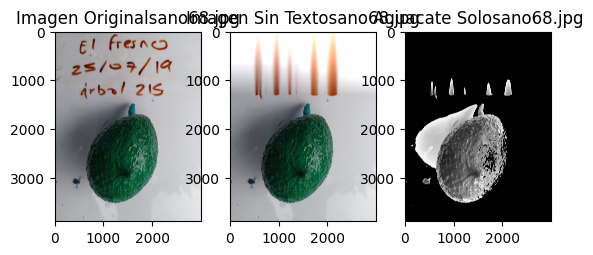

Type: <class 'numpy.ndarray'>
Shape of Image: (4000, 3000, 3)
Total Number of pixels: 36000000
Image data type: uint8
Dimension: 3
{'make': (0x010F) ASCII=Xiaomi @ 258, 'model': (0x0110) ASCII=Redmi Note 7 @ 146, 'latitude': 2.380914972222222, 'longitude': -76.61349197222222, 'ImageDateTime': (0x0132) ASCII=2019:07:25 09:47:35 @ 222, 'Image YCbCrPositioning': 'No disponible', 'ImageExifOffset': (0x8769) Long=265 @ 78, 'ImageResolutionUnit': (0x0128) Short=Pixels/Inch @ 90, 'GPSLatitudeRef': (0x0001) ASCII=N @ 818, 'GPSLatitude': (0x0002) Ratio=[2, 22, 512939/10000] @ 922, 'GPSLongitudeRef': (0x0003) ASCII=W @ 842, 'GPSLongitude': (0x0004) Ratio=[76, 36, 485711/10000] @ 946, 'GPSAltitudeRef': (0x0005) Byte=0 @ 866, 'GPSAltitude': (0x0006) Ratio=503661/250 @ 970, 'GPSTimeStamp': (0x0007) Ratio=[14, 47, 35] @ 978, 'GPSProcessingMethod': (0x001B) Undefined=[65, 83, 67, 73, 73, 0, 0, 0, 71, 80, 83, 0] @ 1002, 'GPSDate': (0x001D) ASCII=2019:07:25 @ 1014, 'ImageGPSInfo': (0x8825) Long=808 @ 1

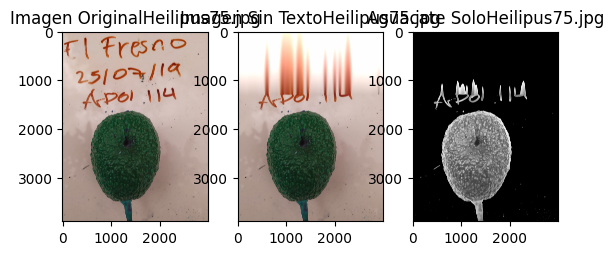

Type: <class 'numpy.ndarray'>
Shape of Image: (4000, 3000, 3)
Total Number of pixels: 36000000
Image data type: uint8
Dimension: 3
{'make': (0x010F) ASCII=Xiaomi @ 258, 'model': (0x0110) ASCII=Redmi Note 7 @ 146, 'latitude': 2.371234972222222, 'longitude': -76.60770597222222, 'ImageDateTime': (0x0132) ASCII=2019:07:31 07:11:37 @ 222, 'Image YCbCrPositioning': 'No disponible', 'ImageExifOffset': (0x8769) Long=265 @ 78, 'ImageResolutionUnit': (0x0128) Short=Pixels/Inch @ 90, 'GPSLatitudeRef': (0x0001) ASCII=N @ 818, 'GPSLatitude': (0x0002) Ratio=[2, 22, 164459/10000] @ 922, 'GPSLongitudeRef': (0x0003) ASCII=W @ 842, 'GPSLongitude': (0x0004) Ratio=[76, 36, 55483/2000] @ 946, 'GPSAltitudeRef': (0x0005) Byte=0 @ 866, 'GPSAltitude': (0x0006) Ratio=1013199/500 @ 970, 'GPSTimeStamp': (0x0007) Ratio=[12, 11, 37] @ 978, 'GPSProcessingMethod': (0x001B) Undefined=[65, 83, 67, 73, 73, 0, 0, 0, 71, 80, 83, 0] @ 1002, 'GPSDate': (0x001D) ASCII=2019:07:31 @ 1014, 'ImageGPSInfo': (0x8825) Long=808 @ 10

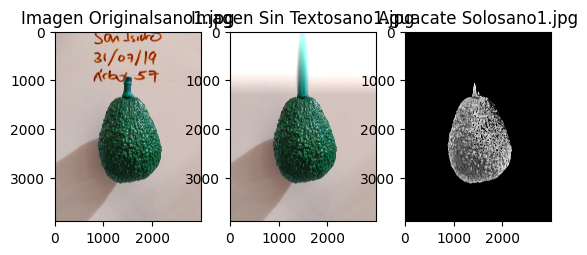

Type: <class 'numpy.ndarray'>
Shape of Image: (4000, 3000, 3)
Total Number of pixels: 36000000
Image data type: uint8
Dimension: 3
{'make': (0x010F) ASCII=Xiaomi @ 258, 'model': (0x0110) ASCII=Redmi Note 7 @ 146, 'latitude': 2.381542, 'longitude': -76.61339699999999, 'ImageDateTime': (0x0132) ASCII=2019:07:25 10:34:07 @ 222, 'Image YCbCrPositioning': 'No disponible', 'ImageExifOffset': (0x8769) Long=265 @ 78, 'ImageResolutionUnit': (0x0128) Short=Pixels/Inch @ 90, 'GPSLatitudeRef': (0x0001) ASCII=N @ 818, 'GPSLatitude': (0x0002) Ratio=[2, 22, 66939/1250] @ 922, 'GPSLongitudeRef': (0x0003) ASCII=W @ 842, 'GPSLongitude': (0x0004) Ratio=[76, 36, 120573/2500] @ 946, 'GPSAltitudeRef': (0x0005) Byte=0 @ 866, 'GPSAltitude': (0x0006) Ratio=252261/125 @ 970, 'GPSTimeStamp': (0x0007) Ratio=[15, 34, 7] @ 978, 'GPSProcessingMethod': (0x001B) Undefined=[65, 83, 67, 73, 73, 0, 0, 0, 71, 80, 83, 0] @ 1002, 'GPSDate': (0x001D) ASCII=2019:07:25 @ 1014, 'ImageGPSInfo': (0x8825) Long=808 @ 102, 'ImageXRe

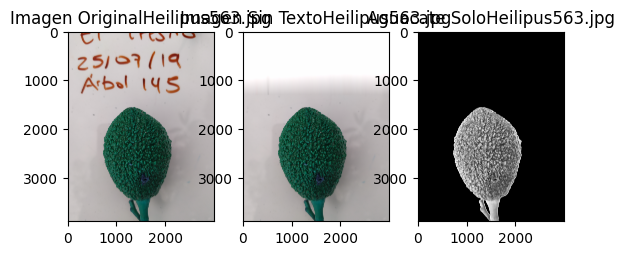

Type: <class 'numpy.ndarray'>
Shape of Image: (4000, 3000, 3)
Total Number of pixels: 36000000
Image data type: uint8
Dimension: 3
{'make': (0x010F) ASCII=Xiaomi @ 258, 'model': (0x0110) ASCII=Redmi Note 7 @ 146, 'latitude': 2.3811619722222224, 'longitude': -76.61345899999999, 'ImageDateTime': (0x0132) ASCII=2019:07:25 09:28:10 @ 222, 'Image YCbCrPositioning': 'No disponible', 'ImageExifOffset': (0x8769) Long=265 @ 78, 'ImageResolutionUnit': (0x0128) Short=Pixels/Inch @ 90, 'GPSLatitudeRef': (0x0001) ASCII=N @ 818, 'GPSLatitude': (0x0002) Ratio=[2, 22, 521831/10000] @ 922, 'GPSLongitudeRef': (0x0003) ASCII=W @ 842, 'GPSLongitude': (0x0004) Ratio=[76, 36, 121131/2500] @ 946, 'GPSAltitudeRef': (0x0005) Byte=0 @ 866, 'GPSAltitude': (0x0006) Ratio=254173/125 @ 970, 'GPSTimeStamp': (0x0007) Ratio=[14, 28, 9] @ 978, 'GPSProcessingMethod': (0x001B) Undefined=[65, 83, 67, 73, 73, 0, 0, 0, 71, 80, 83, 0] @ 1002, 'GPSDate': (0x001D) ASCII=2019:07:25 @ 1014, 'ImageGPSInfo': (0x8825) Long=808 @ 10

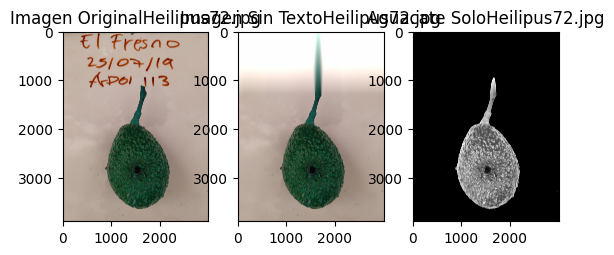

{(4000, 3000, 3)}
set()


In [5]:

import os
# Configurar la variable de entorno QT_QPA_PLATFORM para utilizar xcb (X11)



def getImageAvocato(imagen,nombre, x_inicio, y_inicio, x_fin, y_fin):
    # Crear una máscara con la región del texto en blanco y el resto en negro
    mascara = np.zeros_like(imagen[:, :, 0])
    mascara[y_inicio:y_fin, x_inicio:x_fin] = 255

    # Aplicar el relleno (inpaint) para eliminar el texto
    imagen_sin_texto = cv2.inpaint(imagen, mascara, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Convertir la imagen resultante a escala de grises
    imagen_gris = cv2.cvtColor(imagen_sin_texto, cv2.COLOR_BGR2GRAY)

    # Aplicar la segmentación para obtener el aguacate
    _, imagen_segmentada = cv2.threshold(imagen_gris, 100, 255, cv2.THRESH_BINARY)

    # Invertir la máscara de la segmentación
    imagen_segmentada_invertida = cv2.bitwise_not(imagen_segmentada)

    # Obtener el aguacate eliminando el fondo
    aguacate_solo = cv2.bitwise_and(imagen_gris, imagen_gris, mask=imagen_segmentada_invertida)


    aguacate_imagen_blur = cv2.GaussianBlur(imagen_gris, (5, 5), 0)

    # Detectar círculos utilizando la transformada de Hough circular
    circulos = cv2.HoughCircles(aguacate_imagen_blur, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=20, param2=20, minRadius=10, maxRadius=50)

    # Si se detectaron círculos
    if circulos is not None:
        circulos = np.uint16(np.around(circulos))
        for circulo in circulos[0, :]:
            centro = (circulo[0], circulo[1])
            radio = circulo[2]

            # Dibujar el círculo en la imagen original
            cv2.circle(imagen_gris, centro, radio, (0, 0, 255), 2)
    else:
        print("No se encontraron círculos.")

    # Mostrar las imágenes en un gráfico
    Titles = ["Imagen Original"+nombre, "Imagen Sin Texto"+nombre, "Aguacate Solo"+nombre]
    images = [imagen, imagen_sin_texto, aguacate_solo]






    count = len(Titles)
    for i in range(count):
        plt.subplot(1, count, i + 1)
        plt.title(Titles[i])
        plt.imshow(images[i], cmap='gray')

    plt.show()

    return aguacate_solo



directorio = "/content/assets"

# Obtener la lista de archivos en el directorio
archivos = os.listdir(directorio)
cellphones = set([])
pixels=set([])
datamodel=[]
# Iterar sobre cada archivo en la lista
for archivo in archivos:
    if archivo.endswith(".jpg"):  # Asegúrate de que solo proceses archivos de imagen
        ruta_imagen = os.path.join(directorio, archivo)
        imagen_load = cv2.imread(ruta_imagen)


        print("Type:",type(imagen_load))
        print("Shape of Image:", imagen_load.shape)
        print('Total Number of pixels:', imagen_load.size)
        print("Image data type:",imagen_load.dtype)
        # print("Pixel Values:\n", img)
        print("Dimension:", imagen_load.ndim)
        properties = obtener_informacion_camara(ruta_imagen)
        properties['foto']=archivo
        datamodel.append(properties)



        pixels.add(imagen_load.shape)
        imagen = imagen_load[100:, :]  # Coordenadas de la región del texto a eliminar
        x_inicio, y_inicio, x_fin, y_fin = 0, 0, 3000, 1300  # Ejemplo
        imagenLimpia= getImageAvocato(imagen,archivo, x_inicio, y_inicio, x_fin, y_fin)

        cv2.imwrite(directorio+"/process/fil_"+archivo, imagenLimpia)
print(pixels)
print(cellphones)












In [ ]:
#imagen_segmentada_invertida = cv2.bitwise_not(imagen_segmentada)

# Aplicar la máscara invertida al fondo
aguacate_solo = cv2.bitwise_and(imagen, imagen, mask=imagen_segmentada_invertida)

# Mostrar la imagen resultante
cv2.imshow("Aguacate Solo", aguacate_solo)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar la imagen resultante
cv2.imwrite("aguacate_solo.jpg", aguacate_solo)

NameError: name 'imagen_segmentada_invertida' is not defined